In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [177]:
df_vendas = pd.read_csv('./datasets/sales_data.csv')

In [178]:
df_vendas.head()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681


# EDA

In [179]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [180]:
df_vendas.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


<Axes: xlabel='tempo_de_experiencia'>

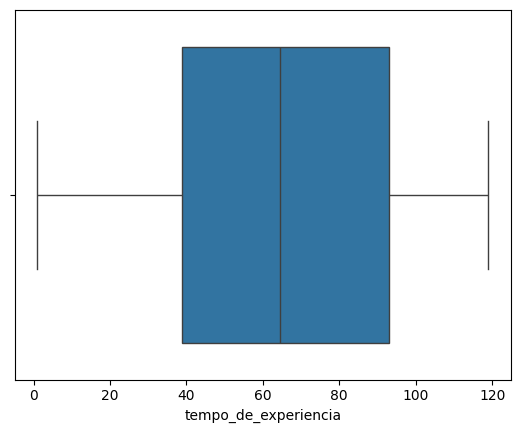

In [181]:
sns.boxplot(data=df_vendas, x='tempo_de_experiencia')

<Axes: xlabel='numero_de_vendas'>

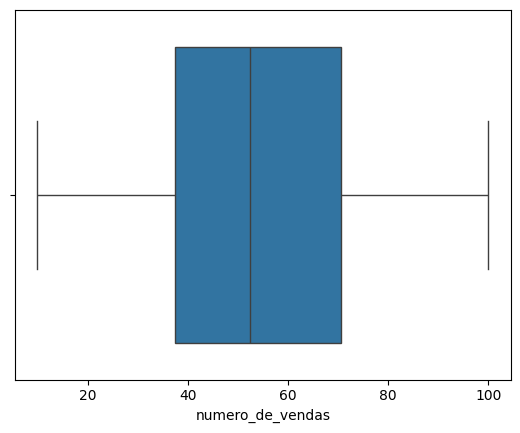

In [182]:
sns.boxplot(data=df_vendas, x='numero_de_vendas')

<Axes: xlabel='fator_sazonal'>

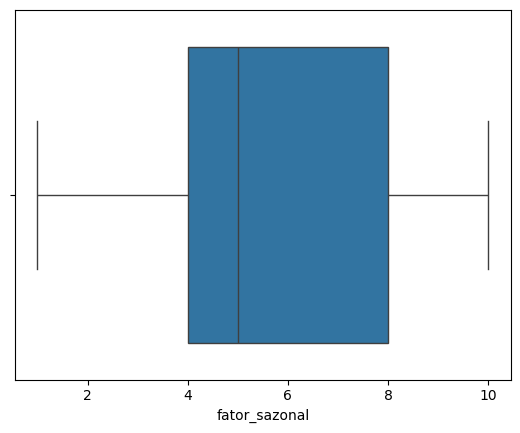

In [183]:
sns.boxplot(data=df_vendas, x='fator_sazonal')

<Axes: xlabel='receita_em_reais'>

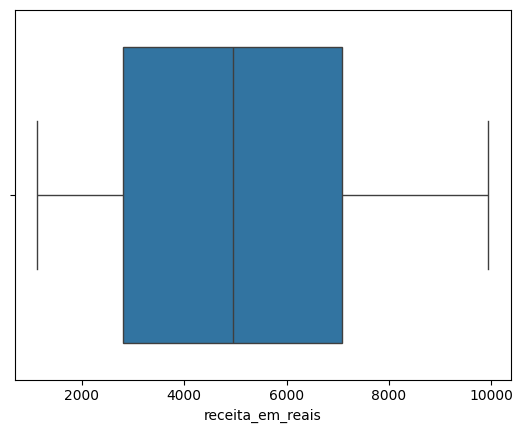

In [184]:
sns.boxplot(data=df_vendas, x='receita_em_reais')

<Axes: xlabel='tempo_de_experiencia', ylabel='receita_em_reais'>

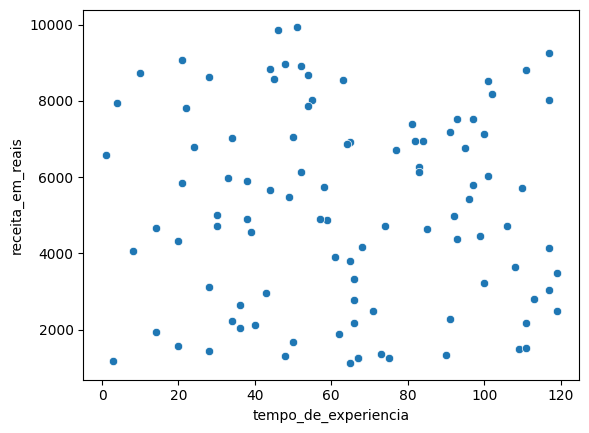

In [185]:
sns.scatterplot(data=df_vendas, x='tempo_de_experiencia', y='receita_em_reais')

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

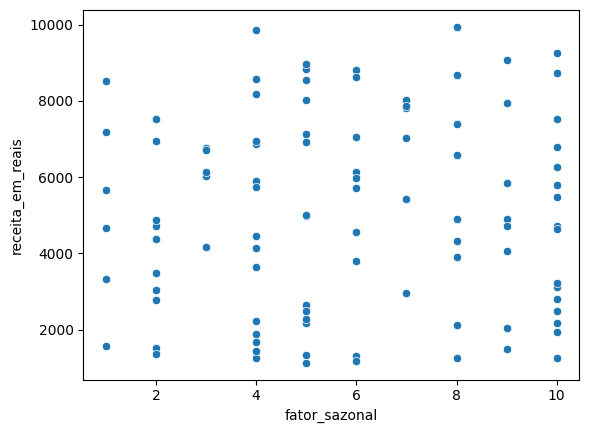

In [186]:
sns.scatterplot(data=df_vendas, x='fator_sazonal', y='receita_em_reais')

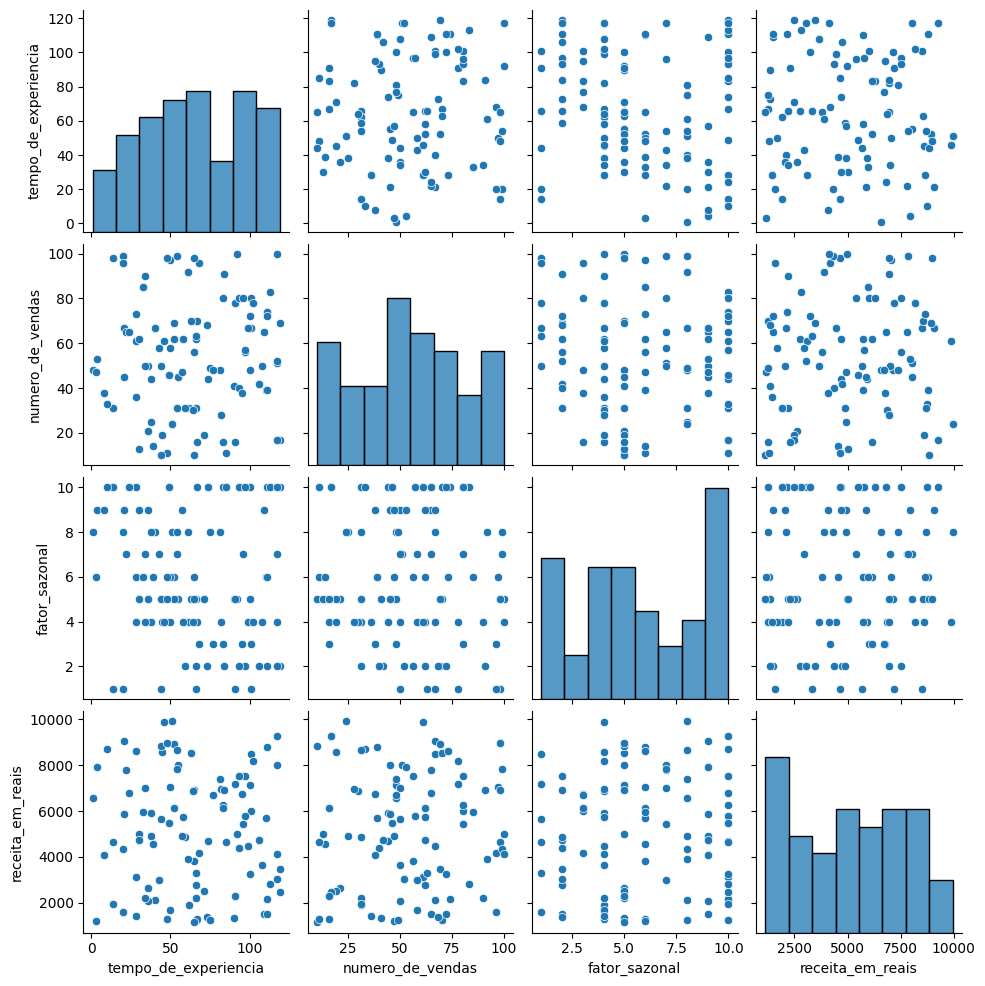

In [187]:
sns.pairplot(df_vendas)

<Axes: >

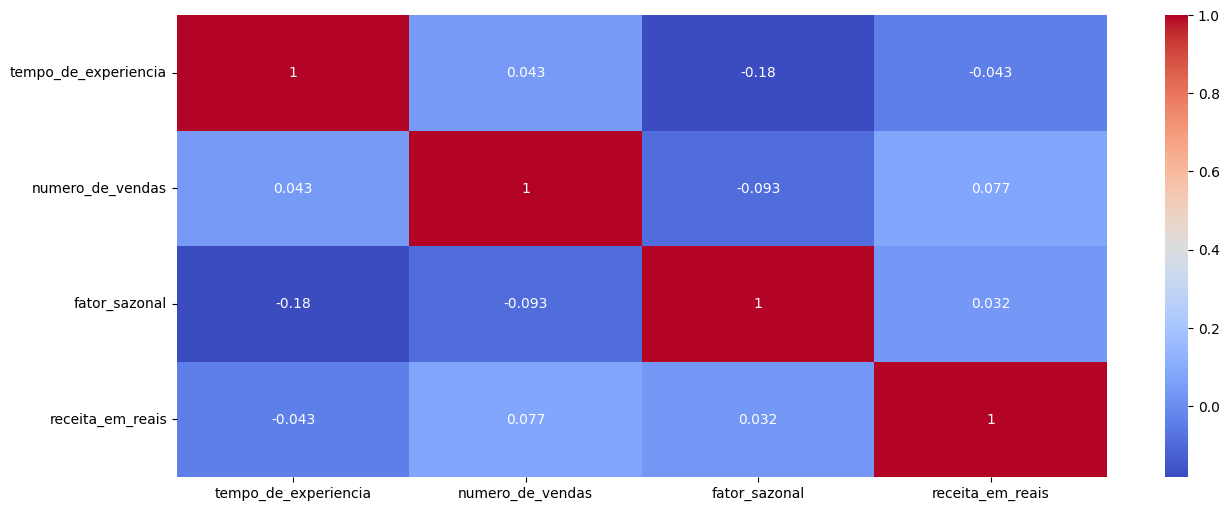

In [188]:
# Correlação - Pearson
plt.figure(figsize=(15, 6))
sns.heatmap(df_vendas.corr(), annot=True, cmap="coolwarm")

<Axes: >

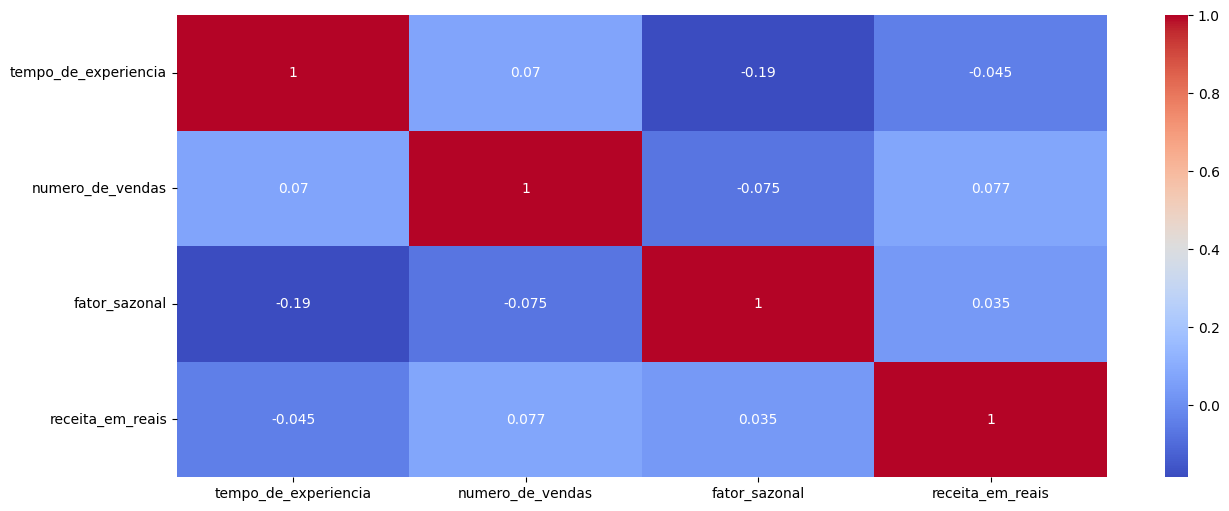

In [189]:
# Correlação - Spearman
plt.figure(figsize=(15, 6))
sns.heatmap(df_vendas.corr('spearman'), annot=True, cmap="coolwarm")

<Axes: >

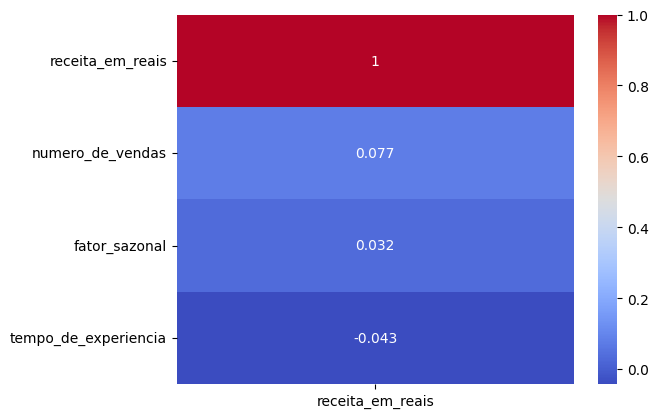

In [190]:
sns.heatmap(df_vendas.corr()[['receita_em_reais']].sort_values(by='receita_em_reais', ascending=False), annot=True, cmap='coolwarm')

# Treinar - Modelo Linear

In [191]:
# Importar as bibliotecas
from sklearn.model_selection import KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from scipy.stats import zscore

import numpy as np

In [202]:
# Criar o dataset de treino e teste
X = df_vendas.drop(columns=['receita_em_reais'], axis=1)
y = df_vendas['receita_em_reais']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo - Regressão Linear

In [203]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

In [205]:
# Avaliando modelo linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"MSE : {mse_linear}")
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
print(f"RMSE: {rmse_linear}")
r2_score_linear = r2_score(y_test, y_pred_linear)
print(f"R²  : {r2_score_linear}")

MSE : 4839044.565665032
RMSE: 2199.782845115634
R²  : -0.06596934817736022


## Modelo - Regressão Polinomial

In [206]:
poly_feat = PolynomialFeatures(degree=2)
X_train_poly = poly_feat.fit_transform(X_train)
X_test_poly = poly_feat.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

In [207]:
# Avaliando modelo polinomila
mse_linear = mean_squared_error(y_test, y_pred_poly)
print(f"MSE : {mse_linear}")
rmse_linear = root_mean_squared_error(y_test, y_pred_poly)
print(f"RMSE: {rmse_linear}")
r2_score_linear = r2_score(y_test, y_pred_poly)
print(f"R²  : {r2_score_linear}")

MSE : 3983443.605153802
RMSE: 1995.856609366966
R²  : 0.12250678296790785


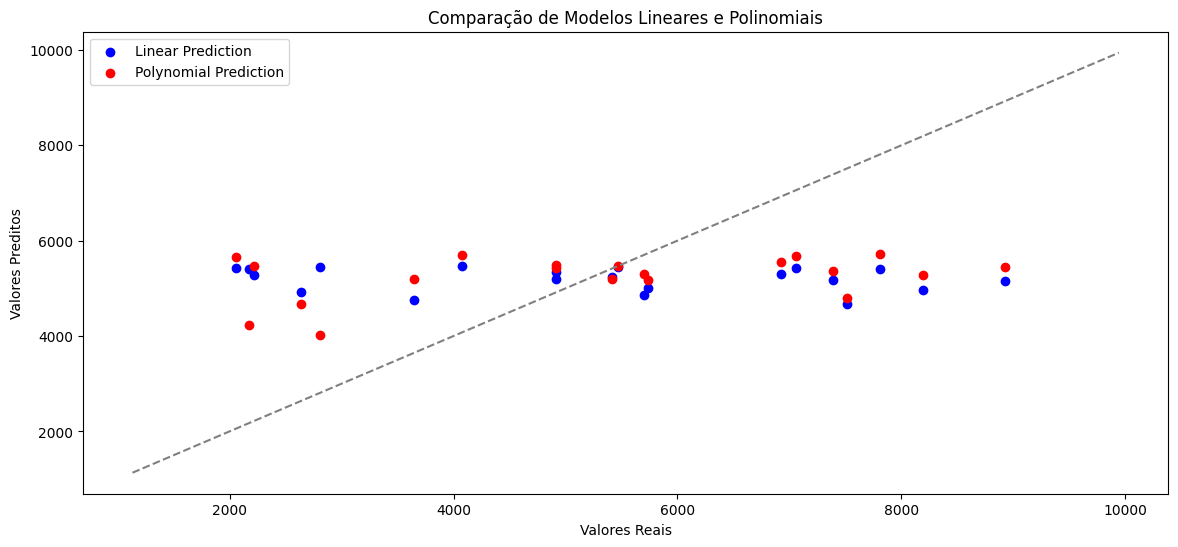

In [208]:
# Comparação Gráfica
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Prediction')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Modelos Lineares e Polinomiais')
plt.legend()
plt.show()